In [5]:
!pip install gspread
!pip install oauth2client
!pip install pandas
#!pip install wordcloud
!pip install tabulate

  Using cached gspread-6.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached google_auth-2.29.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached StrEnum-0.4.15-py3-none-any.whl.metadata (5.3 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pyasn1-0.6.0-py2.py3-none-any.whl.metadata (8.3 kB)
Using cached gspread-6.1.0-py3-none-any.whl (55 kB)
Using cached StrEnum-0.4.15-py3-none-any.whl (8.9 kB)
Using cached google_auth-2.29.0-py2.py3-none-any.whl (189 kB)
Using cached google_auth_oauthlib-1.2.0-py2.py3-none-any.whl (24 kB)
Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)
Using cached pyasn1_modules-0.4.0-py3-none-any.whl (181 kB)
Using cached requests_oau

In [6]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
#from wordcloud import WordCloud
import os
print(os.getcwd())

/home/rstudio/Datahub Semester by Semester Course Analysis/Python Scripts for querying course info


In [7]:
# Define the scope and credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('read_gsheet.json', scope)

# Authenticate with Google Sheets API
client = gspread.authorize(credentials)

# Open the Google Spreadsheet containing consolidated course related information by its URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1jgDeGwhITQqj0X8LwVpNH3TlHQzgtFs5Y88Bi0hvbcQ/edit?usp=sharing'
spreadsheet = client.open_by_url(spreadsheet_url)

# Get the list of all worksheets (tabs) in the spreadsheet
worksheets = spreadsheet.worksheets()

In [8]:
# Iterate over each worksheet and read data
df = pd.DataFrame()
for worksheet in worksheets:
    # Get the worksheet title (tab name)
    tab_name = worksheet.title
    print("Reading data from tab:", tab_name)
    if tab_name == "DLAB" or tab_name == "Material Science" or tab_name == "High Level Metrics (FA 23 and SP 24)" or tab_name == "Course List(FA 23 and SP 23)":
#or tab_name == "Legal Studies"
        continue
    elif tab_name == "High Level Metrics (Historical Data)":
        historical_data = worksheet.get_all_values()   
    else:    
        # Read data from the current worksheet
        data = worksheet.get_all_values()
            # Convert the data to a DataFrame
        df_temp = pd.DataFrame(data[1:], columns=data[0])
#        print(df_temp)
        # Add a column to store the worksheet name
        df_temp['worksheet_name'] = worksheet.title
        # Concatenate the DataFrame with the main DataFrame
        df = pd.concat([df, df_temp], ignore_index=True)

Reading data from tab: High Level Metrics (FA 23 and SP 24)
Reading data from tab: Course List(FA 23 and SP 23)
Reading data from tab: High Level Metrics (Historical Data)
Reading data from tab: DSUS 
Reading data from tab: EECS
Reading data from tab: Statistics
Reading data from tab: School of Information
Reading data from tab: Economics
Reading data from tab: Public Health
Reading data from tab: Integrative Biology
Reading data from tab: City and Regional Planning
Reading data from tab: Geography
Reading data from tab: Ethnic Studies
Reading data from tab: Goldman School of Public Policy
Reading data from tab: Physics
Reading data from tab: Comp Bio
Reading data from tab: Astro
Reading data from tab: Intl Studies
Reading data from tab: Mathematics
Reading data from tab: EPS
Reading data from tab: Plant Bio
Reading data from tab: Chemistry
Reading data from tab: Political Science
Reading data from tab: Bio Engg
Reading data from tab: Civil Engg
Reading data from tab: ERG
Reading data 

In [ ]:
pd.set_option('display.max_rows', None)

In [6]:
df = df.rename(columns = {"worksheet_name":"Department Name"})

In [7]:
df = df.drop(df.columns[7], axis = 1)

In [8]:
print(df.columns)

Index(['Course Number', 'Course Name', 'Hub Used', 'Semester Used',
       'Enrollment Count', 'Comments', 'Department Name'],
      dtype='object')


In [9]:
df.shape

(172, 7)

In [10]:
df.replace('', pd.NA, inplace=True)

In [11]:
df["Semester Used"].value_counts()

Semester Used
Not used across both semesters    59
Both                              27
Fall 23                           17
Spring 24                         16
Name: count, dtype: int64

In [12]:
semester_count = df["Semester Used"].value_counts()
semester_count = semester_count.dropna()
semester_count = semester_count.rename({"Not used across both semesters":"Courses not used during FA 23 and SP 24"})
semester_count = semester_count.rename({"Both":"Courses used during both FA 23 and SP 24"})
semester_count = semester_count.rename({"Fall 23":"Courses used only during FA 23"})
semester_count = semester_count.rename({"Spring 24":"Courses used only during SP 24"})
semester_count.head()

Semester Used
Courses not used during FA 23 and SP 24     59
Courses used during both FA 23 and SP 24    27
Courses used only during FA 23              17
Courses used only during SP 24              16
Name: count, dtype: int64

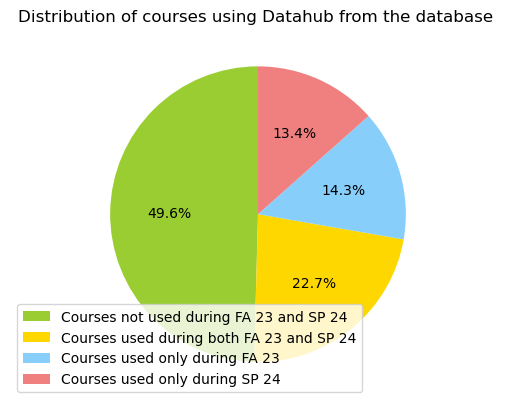

In [13]:
fig = plt.figure()
labels = semester_count.index
plt.title("Distribution of courses using Datahub from the database ")
plt.axis("equal")
plt.pie(semester_count, autopct='%1.1f%%', startangle=90, colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'])
plt.legend(labels, loc="best")
plt.show()

In [14]:
fig.savefig("../images/course_usage.png", transparent = True)

In [15]:
df.head()

,Course Number,Course Name,Hub Used,Semester Used,Enrollment Count,Comments,Department Name
0,Data 8,Foundation of Data Science,Data 8 Hub,Both,1287,<NA>,DSUS
1,Data 100,Principles & Techniques of Data Science,Data 100 Hub,Both,1133,<NA>,DSUS
2,Data 140,Probability for Data Science,Prob 140 Hub,Both,288,<NA>,DSUS
3,Data 88E,Economic Models,Datahub,Fall 23,101,<NA>,DSUS
4,Data 102,"Data, Inference and Decisions",Data 102 Hub,Both,259,<NA>,DSUS


In [16]:
department_count = df["Department Name"].value_counts()

Text(0.5, 1.0, 'Distribution of courses across all departments using Datahub (Historical)')

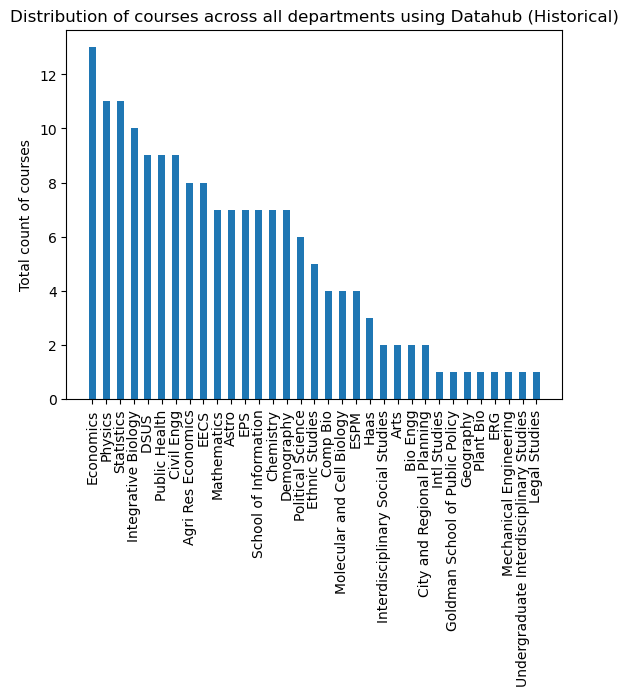

In [17]:
bar_width = 0.5  # Adjust this value to increase or decrease the width between bars
fig,ax = plt.subplots()
plt.xticks(rotation=90)
plt.bar(department_count.index, department_count.values, width = bar_width)
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')
ax.tick_params(axis ='x', colors = 'k')
ax.tick_params(axis ='y', colors = 'k')
plt.ylabel("Total count of courses")
plt.title("Distribution of courses across all departments using Datahub (Historical)")

In [18]:
fig.savefig("../images/dept_count.png", bbox_inches='tight', transparent = True)

In [19]:
semester_used = df["Semester Used"]
course_name = df["Course Name"]
df_AY24 = df[(semester_used != "Not used across both semesters") & (course_name != "").any() & (course_name.notnull()).any() & (course_name != "Total") & (course_name != "Total ")]

In [20]:
df_AY24 = df_AY24.dropna(subset=['Course Name'], how='all')
department_count_AY24 = df_AY24["Department Name"].value_counts()

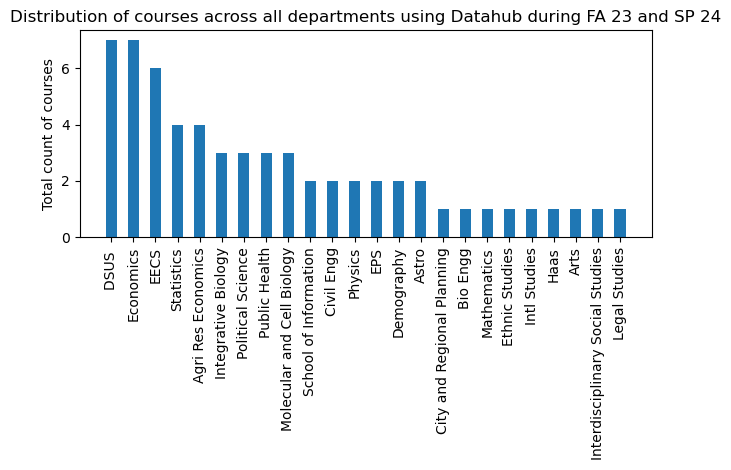

In [21]:
bar_width = 0.5
fig,ax = plt.subplots()
plt.xticks(rotation=90)
plt.bar(department_count_AY24.index, department_count_AY24.values, width = bar_width)
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')
ax.tick_params(axis ='x', colors = 'k')
ax.tick_params(axis ='y', colors = 'k')
plt.ylabel("Total count of courses")
plt.title("Distribution of courses across all departments using Datahub during FA 23 and SP 24")
plt.tight_layout()  # Adjust the layout so everything fits without overlapping

In [22]:
fig.savefig("../images/dept_count_FA23_SP24.png", bbox_inches='tight', transparent = True)

In [24]:
df_AY24['Enrollment Count'] = df_AY24['Enrollment Count'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [25]:
enrollment_counts = df_AY24.groupby('Department Name')["Enrollment Count"].sum().astype(int).reset_index()

In [26]:
enrollment_counts.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt')]}]
)  # Example to set header font size


,Department Name,Enrollment Count
0,Agri Res Economics,325
1,Arts,50
2,Astro,26
3,Bio Engg,0
4,City and Regional Planning,17
5,Civil Engg,178
6,DSUS,3159
7,Demography,191
8,EECS,2536
9,EPS,48


In [27]:
selected_columns = enrollment_counts[['Department Name','Enrollment Count']]
print(tabulate(selected_columns, headers='keys', tablefmt='psql'))

+----+----------------------------------+--------------------+
|    | Department Name                  |   Enrollment Count |
|----+----------------------------------+--------------------|
|  0 | Agri Res Economics               |                325 |
|  1 | Arts                             |                 50 |
|  2 | Astro                            |                 26 |
|  3 | Bio Engg                         |                  0 |
|  4 | City and Regional Planning       |                 17 |
|  5 | Civil Engg                       |                178 |
|  6 | DSUS                             |               3159 |
|  7 | Demography                       |                191 |
|  8 | EECS                             |               2536 |
|  9 | EPS                              |                 48 |
| 10 | Economics                        |               1345 |
| 11 | Ethnic Studies                   |                  0 |
| 12 | Haas                             |              

In [28]:
course_count = df_AY24.groupby('Department Name')["Course Name"].count().reset_index()
department_enrollment_count = pd.merge(enrollment_counts, course_count, on='Department Name')  # For a left join
department_enrollment_count = department_enrollment_count.rename(columns = {"Course Name":"Course Count"})
department_enrollment_count = department_enrollment_count.sort_values(by='Course Count', ascending=False, na_position='first')
department_enrollment_count

,Department Name,Enrollment Count,Course Count
6,DSUS,3159,7
10,Economics,1345,7
8,EECS,2536,6
0,Agri Res Economics,325,4
23,Statistics,1152,4
13,Integrative Biology,772,3
20,Political Science,678,3
21,Public Health,430,3
18,Molecular and Cell Biology,487,3
22,School of Information,239,2


Text(0, 0.5, 'Enrollment Count')

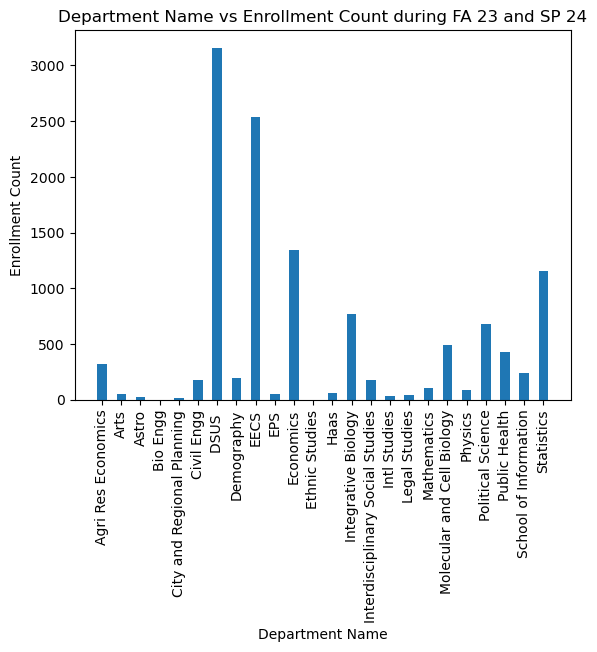

In [29]:
#create a scatter plot which compares enrollment count against departments
fig,ax = plt.subplots()
plt.xticks(rotation=90)
plt.bar(enrollment_counts["Department Name"], enrollment_counts["Enrollment Count"], width = bar_width)
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')
ax.tick_params(axis ='x', colors = 'k')
ax.tick_params(axis ='y', colors = 'k')
plt.title("Department Name vs Enrollment Count during FA 23 and SP 24")
plt.xlabel("Department Name")
plt.ylabel("Enrollment Count")

In [30]:
fig.savefig("../images/dept_enrollment_count_FA23_SP24.png", bbox_inches='tight', transparent = True)

Text(0, 0.5, 'Enrollment Count')

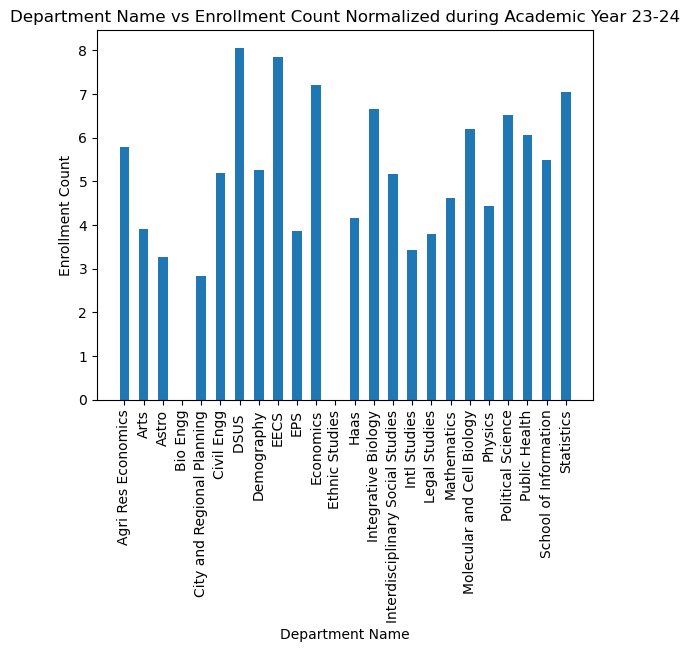

In [31]:
enrollment_counts['Log_Enrollment_Count'] = enrollment_counts['Enrollment Count'].apply(np.log)
bar_width = 0.5
#create a bar plot which compares enrollment count against departments
fig,ax = plt.subplots()
plt.xticks(rotation=90)
plt.bar(enrollment_counts["Department Name"], enrollment_counts["Log_Enrollment_Count"], width = bar_width)
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')
ax.tick_params(axis ='x', colors = 'k')
ax.tick_params(axis ='y', colors = 'k')
plt.title("Department Name vs Enrollment Count Normalized during Academic Year 23-24")
plt.xlabel("Department Name")
plt.ylabel("Enrollment Count")
#plt.show()

In [32]:
fig.savefig("../images/dept_enrollment_logcount_FA23_SP24.png", bbox_inches='tight', transparent = True)

In [33]:
df_AY24.head()

,Course Number,Course Name,Hub Used,Semester Used,Enrollment Count,Comments,Department Name
0,Data 8,Foundation of Data Science,Data 8 Hub,Both,1287.0,<NA>,DSUS
1,Data 100,Principles & Techniques of Data Science,Data 100 Hub,Both,1133.0,<NA>,DSUS
2,Data 140,Probability for Data Science,Prob 140 Hub,Both,288.0,<NA>,DSUS
3,Data 88E,Economic Models,Datahub,Fall 23,101.0,<NA>,DSUS
4,Data 102,"Data, Inference and Decisions",Data 102 Hub,Both,259.0,<NA>,DSUS


In [34]:
course_list = df_AY24[['Course Name', 'Department Name', 'Semester Used', "Enrollment Count"]]
course_list.to_csv("../images/dept_course_list.csv", index = False)

In [105]:
enrollment_counts.to_csv("course_list.csv", index = False)

In [204]:
df_AY24.to_csv("course_list.csv", index = False)

In [92]:
#Get historical course related information from the spreadsheet and visualize it as bar charts
df_historical = pd.DataFrame(historical_data[1:], columns=historical_data[0])

In [93]:
column_index = 2
column_rename = "Enrollment Count"
df_historical = df_historical.rename(columns = {df_historical.columns[column_index]:column_rename})
df_historical.shape

(35, 7)

In [96]:
df_historical["Enrollment Count"].dtype

dtype('int64')

In [95]:
df_historical['Course Count'] = df_historical['Course Count'].astype('int')
df_historical['Enrollment Count'] = df_historical['Enrollment Count'].astype('int')
df_historical.head()

,Department Name,Course Count,Enrollment Count,,,,
0,Data Science Undergraduate Studies (DSUS),8,3209,,,,
1,Statistics,10,1309,,,,
2,Electrical Engineering and Computer Science (E...,6,3348,,,,
3,ISchool,5,566,,,,
4,Public Health,5,547,,,,


Text(0, 0.5, 'Course Count')

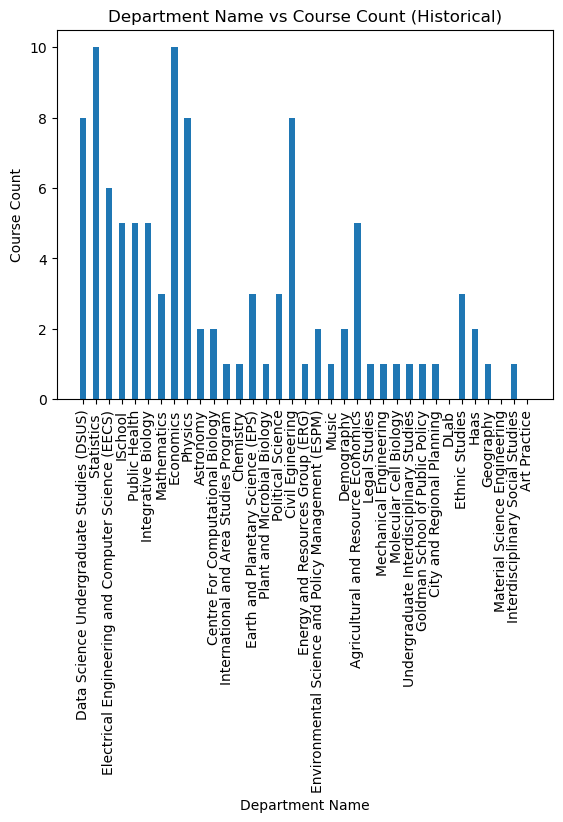

In [97]:
fig,ax = plt.subplots()
plt.xticks(rotation=90)
plt.bar(df_historical["Department Name"], df_historical["Course Count"], width = bar_width)
plt.title("Department Name vs Course Count (Historical)")
plt.xlabel("Department Name")
plt.ylabel("Course Count")

In [98]:
fig.savefig("../images/dept_course_count.png", bbox_inches='tight', transparent = True)

In [99]:
df_historical["Enrollment Count"] = df_historical["Enrollment Count"].sort_values()
df_historical

,Department Name,Course Count,Enrollment Count,,,,
0,Data Science Undergraduate Studies (DSUS),8,3209,,,,
1,Statistics,10,1309,,,,
2,Electrical Engineering and Computer Science (E...,6,3348,,,,
3,ISchool,5,566,,,,
4,Public Health,5,547,,,,
5,Integrative Biology,5,774,,,,
6,Mathematics,3,270,,,,
7,Economics,10,1494,,,,
8,Physics,8,525,,,Departments/Courses using Datahub,
9,Astronomy,2,57,,,Department,35


TypeError: 'list' object is not callable

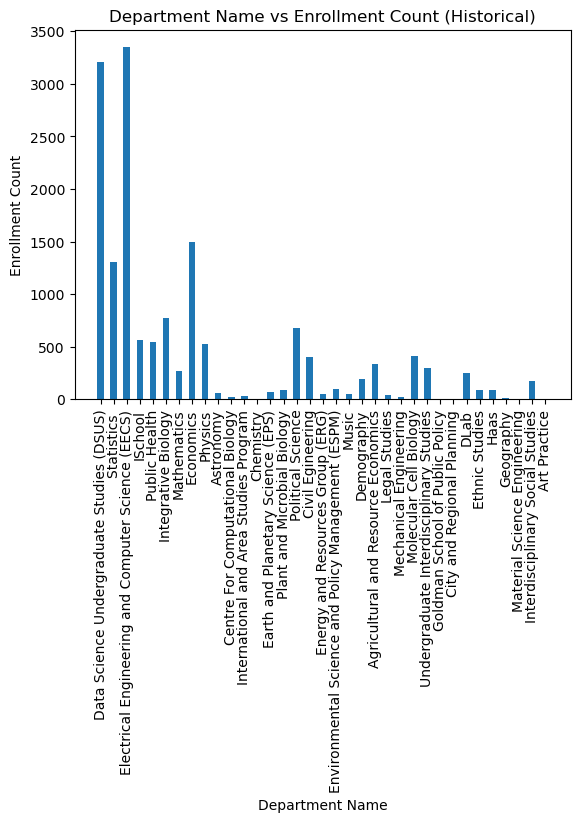

In [100]:
fig,ax = plt.subplots()
#plt.figure(figsize = (15,6))
plt.xticks(rotation=90)
plt.bar(df_historical["Department Name"], df_historical["Enrollment Count"], width = bar_width)
plt.title("Department Name vs Enrollment Count (Historical)")
plt.xlabel("Department Name")
plt.ylabel("Enrollment Count")
plt.yticks(sorted(df_historical["Enrollment Count"]))

In [101]:
fig.savefig("../images/dept_enrollment_count.png", bbox_inches='tight', transparent = True)

In [ ]:
#Failed attempt at creating a word cloud
text = ''
#for department, courses in df_AY24courses_per_department.items():
text += df_AY24["Department Name"] + ' ' + ' '.join(df_AY24["Course Name"]) + ' '
text=str(text)
text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Departments and Courses')
plt.show()